In [72]:
import json
import pandas as pd
import numpy as np
import os
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format',lambda x : '%.2f' % x)

读取内容及数据条数

In [73]:
train_json_path = '/Users/2968492110qq.com/Desktop/project/多模态对话系统意图识别/train_data/train.json'
test_josn_path = '/Users/2968492110qq.com/Desktop/project/多模态对话系统意图识别/test_data/test1.json'

In [74]:
with open(train_json_path,'r') as f:
    train_data = json.load(f)
with open(test_josn_path,'r') as f:
    test_data = json.load(f)   

In [75]:
test_df = pd.DataFrame(test_data)
len(test_df.id.unique())

10000

统一标签

In [104]:
image_scene_label=['商品分类选项','商品头图','商品详情页截图','下单过程中出现异常（显示购买失败浮窗）','订单详情页面',
             '支付页面','评论区截图页面','物流页面-物流列表页面','物流页面-物流跟踪页面','物流页面-物流异常页面',
             '退款页面','退货页面','换货页面','购物车页面','店铺页面',
             '活动页面','优惠券领取页面','账单/账户页面','投诉举报页面','实物拍摄(含售后)',
             '外部APP截图','平台介入页面','其他类别图片']
customer_intent_label=['反馈密封性不好','是否好用','是否会生锈','排水方式','包装区别',
                '发货数量','反馈用后症状','商品材质','功效功能','是否易褪色',
                '适用季节','能否调光','版本款型区别','单品推荐','用法用量',
                '控制方式','上市时间','商品规格','信号情况','养护方法',
                '套装推荐','何时上货','气泡']

In [105]:
len(image_scene_label),len(customer_intent_label)

(23, 23)

In [106]:

train_customer_intent_label=["反馈密封性不好","是否好用","是否会生锈","排水方式","包装区别",
                             "发货数量","反馈用后症状","商品材质","功效功能","是否易褪色",
                             "适用季节","能否调光","版本款型区别","单品推荐","用法用量",
                             "控制方式","上市时间","商品规格","信号情况","养护方法",
                             "套装推荐","何时上货","气泡"]
train_image_scene_label=["实物拍摄(含售后)","商品分类选项","商品头图","商品详情页截图","下单过程中出现异常（显示购买失败浮窗）",
                         "订单详情页面","支付页面","消费者与客服聊天页面","评论区截图页面","物流页面-物流列表页面",
                         "物流页面-物流跟踪页面","物流页面-物流异常页面","退款页面","退货页面","换货页面",
                         "购物车页面","店铺页面","活动页面","优惠券领取页面","账单/账户页面",
                         "个人信息页面","投诉举报页面","平台介入页面","外部APP截图","其他类别图片"]

In [107]:

len(train_image_scene_label),len(train_customer_intent_label)

(25, 23)

In [108]:
differ_label=[label for label in train_image_scene_label if label not in image_scene_label ]
differ_label

['消费者与客服聊天页面', '个人信息页面']

In [110]:
all_label = list(set(train_image_scene_label+train_customer_intent_label))
len(all_label)

48

分析两个场景的数据

In [111]:
df = pd.DataFrame(train_data)
df.head()

,id,instruction,input,output,image
0,213e438b17282904772446704d0b28,你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对...,,商品材质,[213e438b17282904772446704d0b28-0.jpg]
1,2104a80d17282572952783243d0afd,你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对...,,商品材质,[2104a80d17282572952783243d0afd-0.jpg]
2,212c8bd517276234453407314d1039,你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对...,,商品规格,[212c8bd517276234453407314d1039-0.jpg]
3,2166278d17280312481914032d1034,你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对...,,排水方式,[2166278d17280312481914032d1034-0.jpg]
4,21082e0317274845152512370d0a96,你是一个电商客服专家，请根据用户与客服的多轮对话判断用户的意图分类标签。\n<用户与客服的对...,,控制方式,[21082e0317274845152512370d0a96-0.jpg]


In [36]:
# Null 空值统计
for column in df.columns:
    print(column,df[column].isnull().sum())

id 0
instruction 0
input 0
output 0
image 0


In [113]:
train_customer_intent_df = df[df['output'].isin(train_customer_intent_label)]
train_image_scene_label_df = df[df['output'].isin(train_image_scene_label)]
train_customer_intent_df.shape,train_image_scene_label_df.shape

((300, 5), (700, 5))

对话意图识别分类可视化

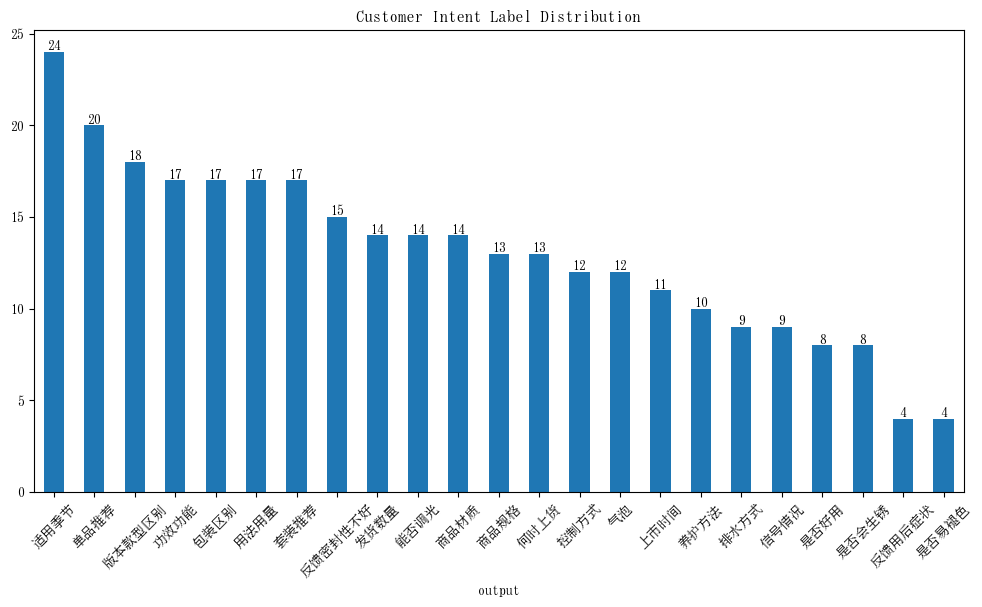

In [115]:
# train_customer_intent_df['output'].value_counts().plot(kind='bar',figsize=(12,6),title='Customer Intent Label Distribution')

ax = train_customer_intent_df['output'].value_counts().plot(kind='bar', figsize=(12, 6),
                                                           title='Customer Intent Label Distribution')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.show()

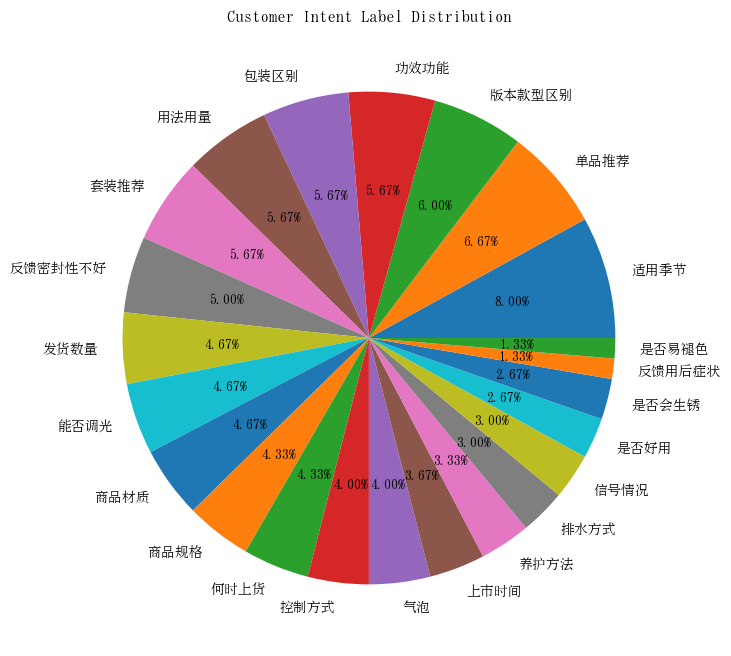

In [ ]:
# 绘制饼状图
ax = train_customer_intent_df['output'].value_counts().plot(kind='pie',
                                                           figsize=(8, 8),
                                                           title='Customer Intent Label Distribution',
                                                           autopct='%1.2f%%',  # 显示百分比
                                                           ylabel='')  # 不显示 y 轴标签

# 显示图形
plt.show()

In [123]:
train_customer_intent_df['output'].value_counts().index,train_customer_intent_df['output'].value_counts().values

(Index(['适用季节', '单品推荐', '版本款型区别', '功效功能', '包装区别', '用法用量', '套装推荐', '反馈密封性不好',
        '发货数量', '能否调光', '商品材质', '商品规格', '何时上货', '控制方式', '气泡', '上市时间', '养护方法',
        '排水方式', '信号情况', '是否好用', '是否会生锈', '反馈用后症状', '是否易褪色'],
       dtype='object', name='output'),
 array([24, 20, 18, 17, 17, 17, 17, 15, 14, 14, 14, 13, 13, 12, 12, 11, 10,
         9,  9,  8,  8,  4,  4]))

图片场景分类

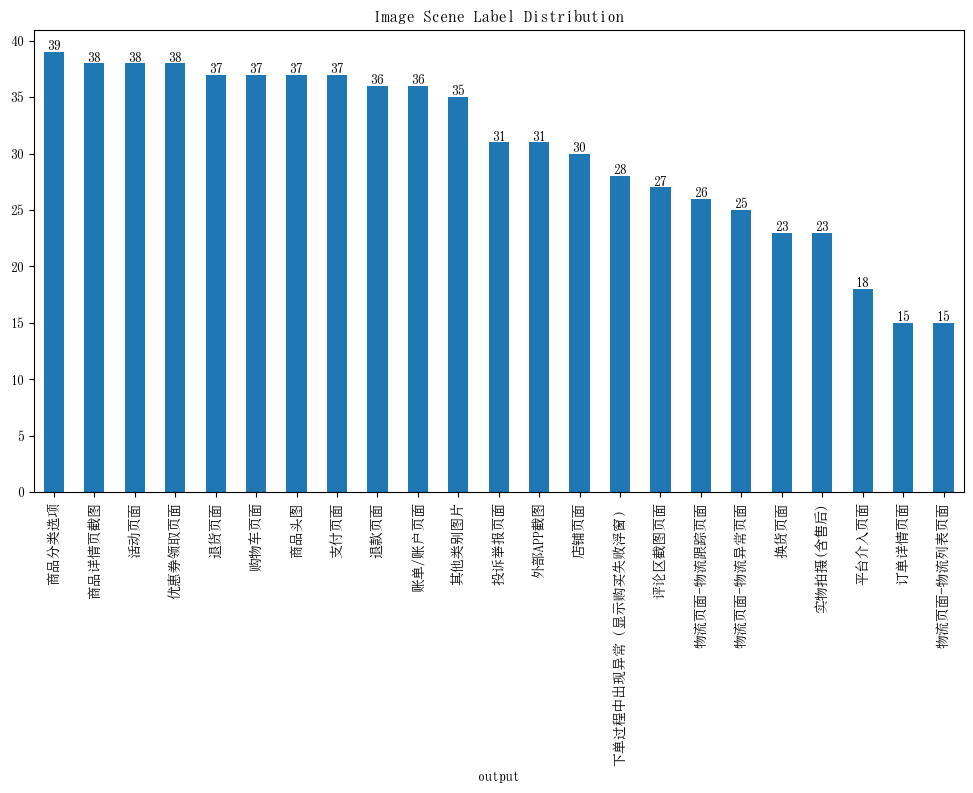

In [140]:
ax = train_image_scene_label_df['output'].value_counts().plot(kind='bar',figsize=(12,6),title='Image Scene Label Distribution')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

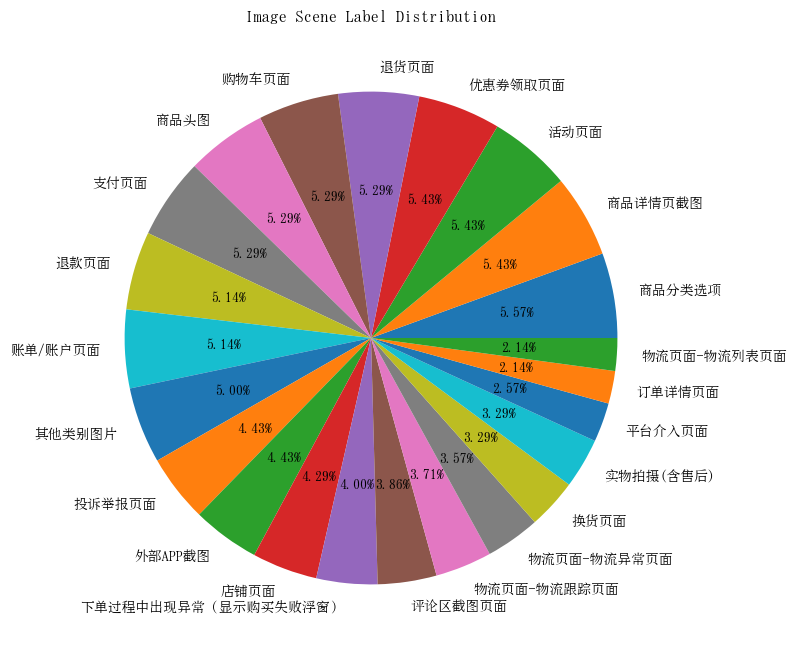

In [134]:
ax = train_image_scene_label_df['output'].value_counts().plot(kind='pie',
                                                              figsize=(8, 8),
                                                              title='Image Scene Label Distribution',
                                                              autopct='%1.2f%%',  # 显示百分比
                                                              ylabel='')  # 不显示 y 轴标签
plt.show()

In [135]:
train_image_scene_label_df['output'].value_counts().index,train_image_scene_label_df['output'].value_counts().values

(Index(['商品分类选项', '商品详情页截图', '活动页面', '优惠券领取页面', '退货页面', '购物车页面', '商品头图', '支付页面',
        '退款页面', '账单/账户页面', '其他类别图片', '投诉举报页面', '外部APP截图', '店铺页面',
        '下单过程中出现异常（显示购买失败浮窗）', '评论区截图页面', '物流页面-物流跟踪页面', '物流页面-物流异常页面', '换货页面',
        '实物拍摄(含售后)', '平台介入页面', '订单详情页面', '物流页面-物流列表页面'],
       dtype='object', name='output'),
 array([39, 38, 38, 38, 37, 37, 37, 37, 36, 36, 35, 31, 31, 30, 28, 27, 26,
        25, 23, 23, 18, 15, 15]))

In [50]:
value_counts.index

Index(['商品分类选项', '活动页面', '商品详情页截图', '优惠券领取页面', '退货页面', '购物车页面', '商品头图', '支付页面',
       '账单/账户页面', '退款页面', '其他类别图片', '外部APP截图', '投诉举报页面', '店铺页面',
       '下单过程中出现异常（显示购买失败浮窗）', '评论区截图页面', '物流页面-物流跟踪页面', '物流页面-物流异常页面', '适用季节',
       '换货页面', '实物拍摄(含售后)', '单品推荐', '版本款型区别', '平台介入页面', '包装区别', '用法用量', '套装推荐',
       '功效功能', '反馈密封性不好', '物流页面-物流列表页面', '订单详情页面', '发货数量', '能否调光', '商品材质',
       '何时上货', '商品规格', '控制方式', '气泡', '上市时间', '养护方法', '信号情况', '排水方式', '是否会生锈',
       '是否好用', '反馈用后症状', '是否易褪色'],
      dtype='object', name='output')

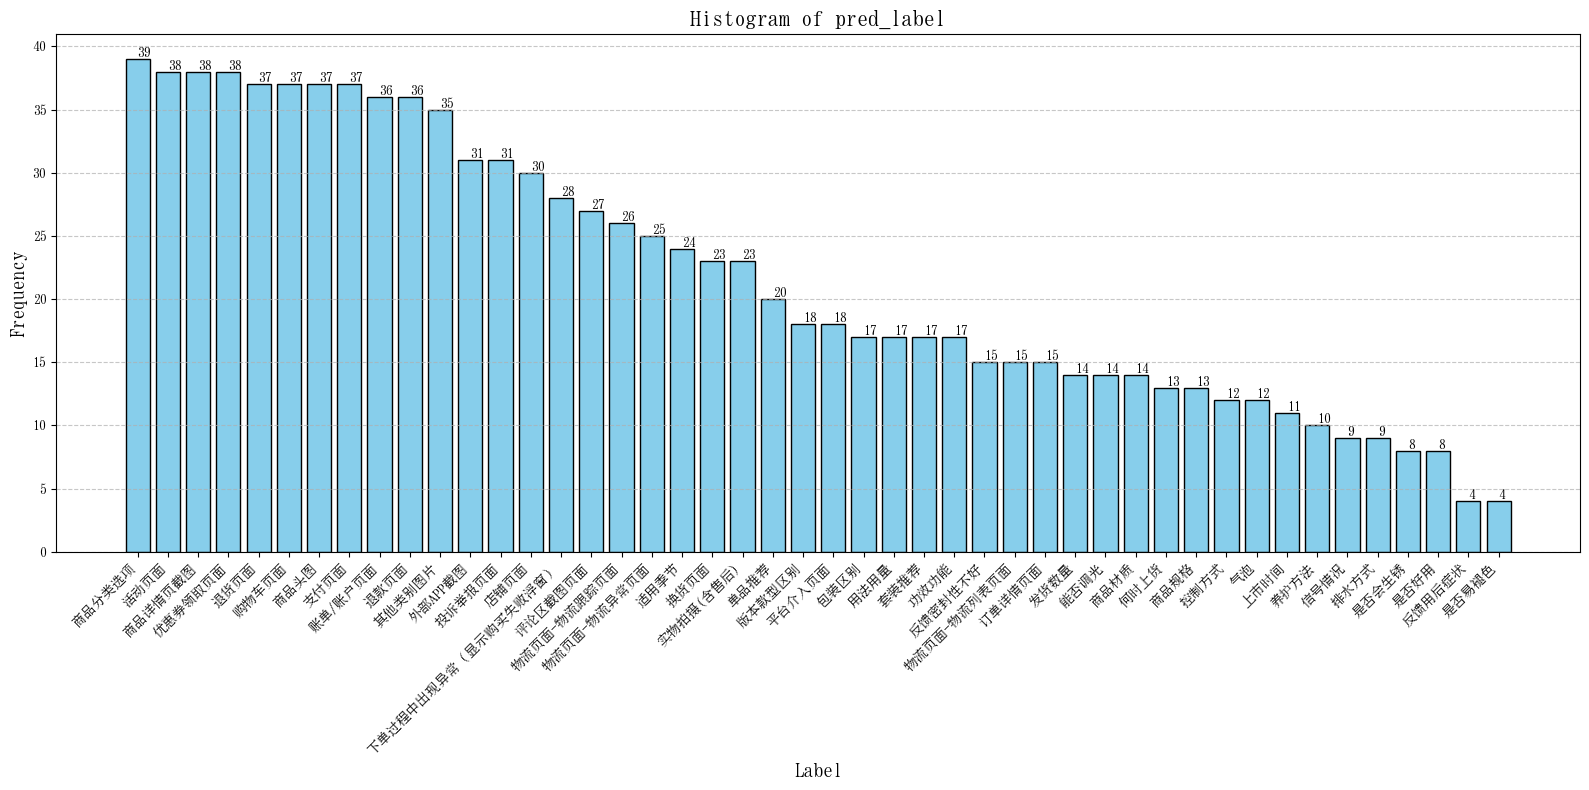

In [53]:
plt.figure(figsize=(16,8))
bars = plt.bar(value_counts.index, value_counts.values,color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Histogram of pred_label', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') 
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
plt.show()